In [19]:
import shapefile
from pandas import DataFrame
from geopandas import GeoDataFrame
from shapely.geometry import Point
# read the shapefile
reader = shapefile.Reader("../philly/STR_Centerline/Street_Centerline.shp")
fields = reader.fields[1:]
field_names = [field[0] for field in fields]
buffer = []
for sr in reader.shapeRecords():
    atr = dict(zip(field_names, sr.record))
    geom = sr.shape.__geo_interface__
    buffer.append(dict(type="Feature", \
    geometry=geom, properties=atr))

# write the GeoJSON file
buffer = str(buffer)
from json import dumps
gjson = open("../philly/GeoJSON_data/Street_Centerline.json", "w+")
gjson.write(dumps({"type": "FeatureCollection",\
"features": buffer}, indent=2) + "\n")
gjson.close()

In [1]:
%pylab inline
import geopandas as gpd
from geopandas.tools import sjoin
import pandas as pd
from IPython.display import display
from pandas import DataFrame
from geopandas import GeoDataFrame
from shapely.geometry import Point

Populating the interactive namespace from numpy and matplotlib


In [37]:
# street_gpd_2.crs = fiona.crs.from_epsg(102729)
street_gpd_2.crs = {'init':'epsg:102729'}

In [3]:
import geojson, json

(41022, 31)


,0,1,2,3,4
CLASS,3,3,3,5,4
FNODE_,2,2,1,6,5
LENGTH,449.863,540.083,446.104,447.261,148.216
LPOLY_,0,0,0,0,0
L_F_ADD,1500,400,1600,1600,350
L_HUNDRED,1500,400,1600,1600,300
L_T_ADD,1598,498,1698,1698,398
MULTI_REP,0,0,0,0,0
NEWSEGDATE,None,None,None,None,None
ONEWAY,FT,TF,FT,TF,TF


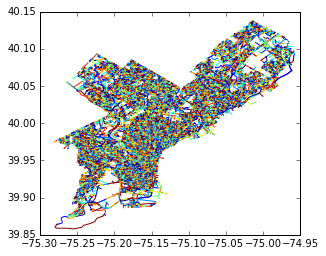

In [4]:
street_gpd = gpd.read_file('../philly/GeoJSON_data/Street_Centerline_qgis3.geojson')
street_gpd.plot()
print(street_gpd.shape)
street_gpd.head().T

In [5]:
collision_gpd = gpd.read_file('../philly/GeoJSON_data/GIS_HEALTH.Collisions_crash_2011_2014PUBV.geojson')
print(collision_gpd.shape)

(43488, 54)


In [6]:
collision_gpd.head().T

,0,1,2,3,4
AUTOMOBILE_COUNT,0,1,1,1,0
BELTED_DEATH_COUNT,0,0,0,0,0
BELTED_MAJ_INJ_COUNT,0,0,0,0,0
BICYCLE_COUNT,0,1,1,0,0
BICYCLE_DEATH_COUNT,0,0,0,0,0
BICYCLE_MAJ_INJ_COUNT,0,0,0,0,0
BUS_COUNT,0,0,0,0,0
COLLISION_TYPE,1,4,4,8,8
COMM_VEH_COUNT,1,0,0,0,0
CRASH_MONTH,8,8,8,8,8


In [21]:
collision_gpd[collision_gpd.SEG_ID==420708].T

,6682,11674,21114,33351,34755,36630,36938
AUTOMOBILE_COUNT,2,1,2,1,2,2,0
BELTED_DEATH_COUNT,0,0,0,0,0,0,0
BELTED_MAJ_INJ_COUNT,0,0,0,0,0,0,0
BICYCLE_COUNT,0,1,0,0,0,0,1
BICYCLE_DEATH_COUNT,0,0,0,0,0,0,0
BICYCLE_MAJ_INJ_COUNT,0,0,0,0,0,0,0
BUS_COUNT,0,0,0,0,0,0,0
COLLISION_TYPE,4,4,4,4,4,4,4
COMM_VEH_COUNT,0,0,0,0,0,0,0
CRASH_MONTH,10,10,6,1,6,10,10


In [28]:
none_seg_count = 0
for seg in collision_gpd.SEG_ID:
    if seg is None:
        none_seg_count += 1
print(none_seg_count)

0


In [19]:
for col_name in collision_gpd.columns:
    if ('_COUNT' in col_name) or ('_TYPE' in col_name) or ('CRASH' in col_name) or (col_name == 'SEG_ID'):
        print(col_name)

AUTOMOBILE_COUNT
BELTED_DEATH_COUNT
BELTED_MAJ_INJ_COUNT
BICYCLE_COUNT
BICYCLE_DEATH_COUNT
BICYCLE_MAJ_INJ_COUNT
BUS_COUNT
COLLISION_TYPE
COMM_VEH_COUNT
CRASH_MONTH
CRASH_YEAR
FATAL_COUNT
HEAVY_TRUCK_COUNT
INJURY_COUNT
INTERSECT_TYPE
LOCATION_TYPE
MAJ_INJ_COUNT
MCYCLE_DEATH_COUNT
MCYCLE_MAJ_INJ_COUNT
MIN_INJ_COUNT
MOD_INJ_COUNT
MOTORCYCLE_COUNT
PED_COUNT
PED_DEATH_COUNT
PED_MAJ_INJ_COUNT
PERSON_COUNT
SEG_ID
SMALL_TRUCK_COUNT
SUV_COUNT
TCD_TYPE
UNBELTED_OCC_COUNT
UNB_DEATH_COUNT
UNB_MAJ_INJ_COUNT
UNK_INJ_DEG_COUNT
UNK_INJ_PER_COUNT
VAN_COUNT
VEHICLE_COUNT


In [6]:
street_gpd[street_gpd.SEG_ID==960283]

,CLASS,FNODE_,LENGTH,LPOLY_,L_F_ADD,L_HUNDRED,L_T_ADD,MULTI_REP,NEWSEGDATE,ONEWAY,...,STREETLABE,ST_CODE,ST_NAME,ST_TYPE,SUF_DIR,TNODE_,UPDATE_,ZIP_LEFT,ZIP_RIGHT,geometry
22464,2,16299,439.229039,0,9400,9400,9498,0,None,B,...,BUSTLETON AVE,20020,BUSTLETON,AVE,None,16543,1998-10-08,19115,19115,LINESTRING (-75.038401134496 40.08447396565553...


In [7]:
collision_gpd[collision_gpd.CRASH_YEAR=='2014'].shape

(10627, 54)

In [7]:
collision_gpd.groupby(collision_gpd.CRASH_YEAR).size()

CRASH_YEAR
2011    10668
2012    11196
2013    10997
2014    10627
dtype: int64

In [9]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    from math import radians, cos, sin, asin, sqrt
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6367 * c
    m = km *1000
    return m   
def ptfromln(pt, ln):
    n_pt = ln.interpolate(ln.project(pt))
    lon1, lat1 = n_pt.coords[0]
    lon2, lat2 = pt.coords[0]
    return haversine(lon1, lat1, lon2, lat2)
def pts2seg(pts, gp_segs, buffer_dis=50, near_dis_thres=5):
    pts_crs,gp_segs_crs = pts.to_crs(epsg=3559), gp_segs.to_crs(epsg=3559)
    pts_crs_bfr = pts_crs.copy()

    pts_crs_bfr.geometry = pts_crs_bfr.buffer(near_dis_thres*1.1)
    close_jn = gpd.tools.sjoin(pts_crs_bfr, gp_segs_crs)[['OBJECTID','SEG_ID_right']]
    handledid = set(pd.unique(close_jn.OBJECTID))
    mask = (~pts_crs_bfr.OBJECTID.isin(handledid))

    far_jns = []
    while pts_crs_bfr[mask].shape[0]!=0:
        pts_crs_bfr.loc[mask, 'geometry'] = pts_crs_bfr[mask].buffer(buffer_dis)
        jn = gpd.tools.sjoin(pts_crs_bfr[mask], gp_segs_crs)[['OBJECTID','SEG_ID_right']]
        far_jns.append(jn)
        handledid |= set(pd.unique(jn.OBJECTID))
        mask = (~pts_crs_bfr.OBJECTID.isin(handledid))
        
    far_jns = pd.concat(far_jns)
    mr = pd.merge(gp_segs[['geometry','SEG_ID']],far_jns , left_on='SEG_ID', right_on='SEG_ID_right')
    #mr = pd.merge(pts[['OBJECTID','geometry','SEG_ID']],mr, left_on='OBJECTID', right_on='OBJECTID_left')
    mr['dis']=mr.apply(lambda x: ptfromln(x.geometry_x, x.geometry_y),axis=1)
    result = close_jn.groupby('OBJECTID')['SEG_ID_right'].apply(list).append(mr.groupby('OBJECTID').apply(lambda x: [x.ix[x.dis.idxmin()].SEG_ID_y]))
    return pd.DataFrame(result, columns=['segid'])

In [8]:
philly_seg_stats = street_gpd[['SEG_ID', 'SHAPE_LEN', 'geometry']]
philly_seg_stats.shape

(41022, 3)

In [49]:
collision_pt_seg = pts2seg(collision_gpd, philly_seg_stats)

ValueError: need at least one array to concatenate

In [12]:
philly_seg_buffer_gp = street_gpd[['SEG_ID','STCL2_ID','geometry']].copy()
philly_seg_buffer_gp.geometry = philly_seg_buffer_gp.buffer(0.0001)
collision_buffer_gp = collision_gpd[['SEG_ID','OBJECTID', 'geometry','CRASH_YEAR']].copy()
collision_buffer_gp.geometry = collision_buffer_gp.buffer(0.0001)
joined = sjoin(collision_buffer_gp, philly_seg_buffer_gp, how='left', op='intersects')

In [91]:
philly_seg_buffer_gp = street_gpd[['SEG_ID','STCL2_ID','geometry']].copy()
philly_seg_buffer_gp.geometry = philly_seg_buffer_gp.buffer(0.0001)

In [42]:
print(philly_seg_buffer_gp.shape)
philly_seg_buffer_gp.head().T

(41022, 3)


,0,1,2,3,4
SEG_ID,420708,422065,420702,420732,420718
STCL2_ID,85205,86540,85199,85229,85215
geometry,"POLYGON ((2692954.035913117 238893.638507401, ...","POLYGON ((2693439.911167583 239131.2080263407,...","POLYGON ((2692511.692965856 238951.4471188142,...","POLYGON ((2692493.394445261 238804.3647359097,...","POLYGON ((2692511.692879579 238951.4472303169,..."


In [55]:
collision_buffer_gp = collision_gpd[['SEG_ID','OBJECTID','geometry','CRASH_YEAR']].copy()
collision_buffer_gp.geometry = collision_buffer_gp.buffer(0.0001)
print(collision_buffer_gp.shape)
collision_buffer_gp.head().T

(43488, 4)


,0,1,2,3,4
SEG_ID,960283,541001,760684,300613,640755
OBJECTID,4001,4002,4003,4004,4005
geometry,POLYGON ((-75.03785178519658 40.08497541304385...,"POLYGON ((-75.10265539598592 39.990404578965, ...",POLYGON ((-75.05471628915623 40.02929723040301...,POLYGON ((-75.24040521636346 39.95347871767484...,POLYGON ((-75.09046881169107 40.01618353851767...
CRASH_YEAR,2014,2014,2014,2014,2014


In [13]:
joined.shape

(67230, 7)

In [47]:
joined = sjoin(collision_buffer_gp, philly_seg_buffer_gp, how='left', op='intersects')

In [48]:
joined.head().T

,0,1,2,3,4
SEG_ID_left,960283,541001,760684,300613,640755
OBJECTID,4001,4002,4003,4004,4005
geometry,POLYGON ((-75.03785178519658 40.08497541304385...,"POLYGON ((-75.10265539598592 39.990404578965, ...",POLYGON ((-75.05471628915623 40.02929723040301...,POLYGON ((-75.24040521636346 39.95347871767484...,POLYGON ((-75.09046881169107 40.01618353851767...
CRASH_YEAR,2014,2014,2014,2014,2014
index_right,22464,14639,27112,11124,8369
SEG_ID_right,960283,541001,760684,300613,640755
STCL2_ID,1993,1001,9617,82230,4375


In [52]:
street_gpd.crs

{'init': 'epsg:4326'}

In [53]:
collision_gpd.crs

{'init': 'epsg:4326'}

In [49]:
joined.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 67230 entries, 0 to 43487
Data columns (total 7 columns):
SEG_ID_left     66695 non-null float64
OBJECTID        67230 non-null int64
geometry        67230 non-null object
CRASH_YEAR      67230 non-null object
index_right     66694 non-null float64
SEG_ID_right    66694 non-null float64
STCL2_ID        66694 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 4.1+ MB


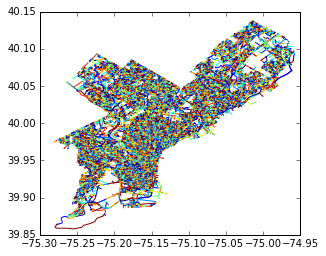

In [17]:
street_gpd.plot()

In [50]:
join_gb = joined.reset_index().groupby('OBJECTID').count()

In [51]:
join_gb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43488 entries, 1 to 43488
Data columns (total 7 columns):
index           43488 non-null int64
SEG_ID_left     43488 non-null int64
geometry        43488 non-null int64
CRASH_YEAR      43488 non-null int64
index_right     43488 non-null int64
SEG_ID_right    43488 non-null int64
STCL2_ID        43488 non-null int64
dtypes: int64(7)
memory usage: 2.7 MB


In [21]:
joined.shape

(67230, 7)

In [29]:
join_gb.shape

(43488, 7)

In [52]:
print(join_gb[join_gb.SEG_ID_right==0].shape[0], ' points spatially match no segment')
print(join_gb[join_gb.SEG_ID_right==1].shape[0], ' points spatially match 1 segment')
print(join_gb[join_gb.SEG_ID_right>1].shape[0], ' points spatially match multiple segments')

536  points spatially match no segment
31630  points spatially match 1 segment
11322  points spatially match multiple segments


In [31]:
join_gb.head().T

OBJECTID,1,2,3,4,5
index,1,2,1,1,1
SEG_ID_left,1,2,1,1,1
geometry,1,2,1,1,1
CRASH_YEAR,1,2,1,1,1
index_right,1,2,1,1,1
SEG_ID_right,1,2,1,1,1
STCL2_ID,1,2,1,1,1


In [41]:
philly_seg_stats.head().T

,0,1,2,3,4
SEG_ID,420708,422065,420702,420732,420718
SHAPE_LEN,449.863,540.083,446.104,447.261,148.216
geometry,LINESTRING (-75.16371257852462 39.959816984389...,LINESTRING (-75.16371257852462 39.959816984389...,LINESTRING (-75.16529687686355 39.960013687935...,LINESTRING (-75.16537539004391 39.959601782423...,LINESTRING (-75.16694872703492 39.959805718080...


In [54]:
join_df = joined[['SEG_ID_left', 'OBJECTID']]

In [62]:
join_df.columns = ['SEG_ID', 'OBJECTID']
join_df.head().T
join_df.info()
philly_seg_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67230 entries, 0 to 43487
Data columns (total 2 columns):
SEG_ID      66695 non-null float64
OBJECTID    67230 non-null int64
dtypes: float64(1), int64(1)
memory usage: 1.5 MB
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 41022 entries, 0 to 41021
Data columns (total 3 columns):
SEG_ID       41022 non-null int64
SHAPE_LEN    41022 non-null float64
geometry     41022 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 961.5+ KB


In [77]:
join_df_numeric = join_df[['SEG_ID', 'OBJECTID']].dropna().astype(int)

In [78]:
join_df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66695 entries, 0 to 43487
Data columns (total 2 columns):
SEG_ID      66695 non-null int64
OBJECTID    66695 non-null int64
dtypes: int64(2)
memory usage: 1.5 MB


In [135]:
collision_count = pd.DataFrame(join_df_numeric.groupby(['SEG_ID']).size().reset_index())
collision_count.columns = ['SEG_ID', 'collision_count']

In [136]:
collision_count.head().T

,0,1,2,3,4
SEG_ID,100002,100003,100006,100007,100008
collision_count,1,15,1,1,1


In [137]:
collision_count[collision_count.SEG_ID == 100003]

,SEG_ID,collision_count
1,100003,15


In [134]:
joined.shape

(67230, 7)

In [141]:
philly_collision_stats = philly_seg_stats.merge(collision_count, on = 'SEG_ID', how = 'inner')

In [142]:
philly_collision_stats.shape

(13186, 4)

In [152]:
philly_collision_stats['collision_count/length'] = philly_collision_stats.collision_count/philly_collision_stats.SHAPE_LEN

In [153]:
philly_collision_stats.head().T

,0,1,2,3,4
SEG_ID,420708,422065,420702,420732,420696
SHAPE_LEN,449.863,540.083,446.104,447.261,319.5
geometry,LINESTRING (-75.16371257852462 39.959816984389...,LINESTRING (-75.16371257852462 39.959816984389...,LINESTRING (-75.16529687686355 39.960013687935...,LINESTRING (-75.16537539004391 39.959601782423...,LINESTRING (-75.16686813417091 39.960207835856...
collision_count,7,1,4,1,2
collsion_count/length,0.0155603,0.00185157,0.00896651,0.00223583,0.00625978
collision_count_norm,0.333648,0.111216,0.258235,0.111216,0.176273
collision_count/length,0.0155603,0.00185157,0.00896651,0.00223583,0.00625978


In [57]:
def normalize(col_name, df):
    col_name_norm = col_name + '_norm'
    df[col_name_norm] = df[col_name]+1
    df[col_name_norm] = np.log2(df[col_name_norm])
    df[col_name_norm] = df[col_name_norm]/df[col_name_norm].max()

In [154]:
normalize('collision_count', philly_collision_stats)
normalize('collision_count/length', philly_collision_stats)

In [155]:
philly_collision_stats.head().T

,0,1,2,3,4
SEG_ID,420708,422065,420702,420732,420696
SHAPE_LEN,449.863,540.083,446.104,447.261,319.5
geometry,LINESTRING (-75.16371257852462 39.959816984389...,LINESTRING (-75.16371257852462 39.959816984389...,LINESTRING (-75.16529687686355 39.960013687935...,LINESTRING (-75.16537539004391 39.959601782423...,LINESTRING (-75.16686813417091 39.960207835856...
collision_count,7,1,4,1,2
collsion_count/length,0.0155603,0.00185157,0.00896651,0.00223583,0.00625978
collision_count_norm,0.333648,0.111216,0.258235,0.111216,0.176273
collision_count/length,0.0155603,0.00185157,0.00896651,0.00223583,0.00625978
collision_count/length_norm,0.00826819,0.000990576,0.00478006,0.00119592,0.00334159


In [157]:
def gradient_color(percent):
    min_color = np.array([255,255,255])
    max_color = np.array([65,105,255])
    return '#%02x%02x%02x' % tuple([int(k) for k in min_color+(max_color-min_color)*percent])

def write_var(col_name, var_name, df,f):
    df['color']=df[col_name].apply(gradient_color)
    f.write('var %s = %s;\n' % (var_name, df.to_json()))

with open('../visualization/Volumes of Collisions.js','w+') as f:
    write_var('collision_count_norm', 'collision_count', philly_collision_stats,f)
    write_var('collision_count/length_norm', 'collision_count_norm', philly_collision_stats,f)

In [162]:
philly_collision_stats[philly_collision_stats.SEG_ID==422279]

,SEG_ID,SHAPE_LEN,geometry,collision_count,collsion_count/length,collision_count_norm,collision_count/length,collision_count/length_norm,color
1674,422279,2360.798811,LINESTRING (-75.18428206823198 39.949500166985...,270,0.114368,0.898863,0.114368,0.057987,#f3f6ff


In [165]:
collision_gpd[collision_gpd.SEG_ID==422279.0]

,AUTOMOBILE_COUNT,BELTED_DEATH_COUNT,BELTED_MAJ_INJ_COUNT,BICYCLE_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_MAJ_INJ_COUNT,BUS_COUNT,COLLISION_TYPE,COMM_VEH_COUNT,CRASH_MONTH,...,TIME_OF_DAY,UNBELTED_OCC_COUNT,UNB_DEATH_COUNT,UNB_MAJ_INJ_COUNT,UNK_INJ_DEG_COUNT,UNK_INJ_PER_COUNT,VAN_COUNT,VEHICLE_COUNT,WEATHER,geometry
137,1,0,0,0,0,0,0,7,0,8,...,935,0,0,0,0,0,0,1,1,POINT (-75.18744029819194 39.94735998737308)
957,1,0,0,0,0,0,0,1,0,4,...,1203,0,0,0,0,0,0,2,1,POINT (-75.18744029819194 39.94735998737308)
1321,2,0,0,0,0,0,0,5,0,2,...,106,1,0,0,0,0,0,2,1,POINT (-75.18744029819194 39.94735998737308)
1778,1,0,0,0,0,0,0,4,1,3,...,1005,0,0,0,0,1,0,2,2,POINT (-75.18744029819194 39.94735998737308)
2821,2,0,0,0,0,0,0,4,0,12,...,723,0,0,0,0,0,0,2,1,POINT (-75.18744029819194 39.94735998737308)
2876,0,0,0,0,0,0,0,5,0,3,...,2353,4,0,0,0,0,0,2,1,POINT (-75.18744029819194 39.94735998737308)
2925,1,0,0,0,0,0,0,1,0,1,...,1041,0,0,0,1,0,1,2,1,POINT (-75.18744029819194 39.94735998737308)
4094,1,0,0,0,0,0,0,5,1,10,...,1134,0,0,0,0,0,0,2,1,POINT (-75.18744029819194 39.94735998737308)
5421,2,0,0,0,0,0,0,1,0,11,...,1425,0,0,0,0,0,0,2,1,POINT (-75.18744029819194 39.94735998737308)
5693,1,0,0,0,0,0,0,1,0,12,...,1328,0,0,0,0,0,0,3,1,POINT (-75.18744029819194 39.94735998737308)


In [30]:
print(street_gpd.shape)
street_gpd.head().T

(41022, 31)


,0,1,2,3,4
CLASS,3,3,3,5,4
FNODE_,2,2,1,6,5
LENGTH,449.863,540.083,446.104,447.261,148.216
LPOLY_,0,0,0,0,0
L_F_ADD,1500,400,1600,1600,350
L_HUNDRED,1500,400,1600,1600,300
L_T_ADD,1598,498,1698,1698,398
MULTI_REP,0,0,0,0,0
NEWSEGDATE,None,None,None,None,None
ONEWAY,FT,TF,FT,TF,TF


In [31]:
vpi_data_gpd = gpd.read_file('../philly/Vehicle & Pedestrian Investigations.geojson')
print(vpi_data_gpd.shape)
vpi_data_gpd.head().T

(1296689, 29)


,0,1,2,3,4
:@computed_region_bbgf_pidf,10,14,14,5,5
:created_at,2016-09-28T13:00:32,2016-09-28T13:00:32,2016-09-28T13:00:32,2016-09-28T13:00:32,2016-09-28T13:00:32
:id,row-tywx_zg46-cw84,row-z92m.d7r6~4rji,row-4sb2-6s78_xnur,row-aa32.djwa-fx39,row-xwa5_hp4e-frtk
:updated_at,2016-09-28T13:00:32,2016-09-28T13:00:32,2016-09-28T13:00:32,2016-09-28T13:00:32,2016-09-28T13:00:32
:version,rv-y6zc~yrni.ujrq,rv-z6a6-xsyb~mudr,rv-fwuf_8mhe-vjan,rv-kpt5-325y_zr5u,rv-buwm-pueh_vce5
age,51,28,28,62,30
datetimeoccur,2016-09-08T10:25:00,2016-09-09T01:34:00,2016-09-09T00:38:00,2016-09-08T10:10:00,2016-09-08T11:20:00
dcnumber,None,None,None,None,None
districtoccur,14,18,18,06,06
gender,Male,Female,Female,Male,Male


In [32]:
vpi_data_gpd.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1296689 entries, 0 to 1296688
Data columns (total 29 columns):
:@computed_region_bbgf_pidf    1198809 non-null object
:created_at                    1296689 non-null object
:id                            1296689 non-null object
:updated_at                    1296689 non-null object
:version                       1296689 non-null object
age                            1294550 non-null object
datetimeoccur                  1296689 non-null object
dcnumber                       0 non-null object
districtoccur                  1296688 non-null object
gender                         1296555 non-null object
geometry                       1202146 non-null object
id                             1296689 non-null object
individual_arrested            1296689 non-null object
individual_contraband          1296689 non-null object
individual_frisked             1296689 non-null object
individual_searched            1296689 non-null object
insid

In [22]:
street_gpd = gpd.read_file('../philly/GeoJSON_data/Street_Centerline_qgis3.geojson')

In [23]:
philly311_csv = pd.read_csv('../philly/311_Requests.csv')
print(philly311_csv.shape)
philly311_csv.head().T

(1110623, 17)


,0,1,2,3,4
Service Request ID,10895664,10895669,10894010,10894151,10894702
Requested Date/Time,08/18/2016 06:32:14 PM,08/18/2016 06:35:32 PM,08/18/2016 09:43:32 AM,08/18/2016 10:19:40 AM,08/18/2016 12:36:47 PM
Service Name,Rubbish/Recyclable Material Collection,Rubbish/Recyclable Material Collection,Rubbish/Recyclable Material Collection,Illegal Dumping,Rubbish/Recyclable Material Collection
Service Code,SR-ST03,SR-ST03,SR-ST03,SR-ST02,SR-ST03
Agency Responsible,Streets Department,Streets Department,Streets Department,Streets Department,Streets Department
Status,Closed,Closed,Closed,Closed,Closed
Service Notice,2 Business Days,2 Business Days,2 Business Days,5 Business Days,2 Business Days
Updated Date/Time,08/22/2016 06:15:23 AM,08/22/2016 06:15:26 AM,08/22/2016 06:15:29 AM,08/22/2016 06:15:32 AM,08/22/2016 06:15:35 AM
Expected Date/Time,08/21/2016 08:00:00 PM,08/21/2016 08:00:00 PM,08/21/2016 08:00:00 PM,08/24/2016 08:00:00 PM,08/21/2016 08:00:00 PM
Address,4500 N LAWRENCE ST,4400 N LAWRENCE ST,435 W CAREY ST,3255 N 11TH ST,6500 W WALNUT PARK DR


In [3]:
#data = DataFrame.from_csv(os.path.join(directory, filename), index_col=False)
points = [Point(row['Longitude'], row['Latitude']) for key, row in philly311_csv.iterrows()]
geo_df = GeoDataFrame(philly311_csv,geometry=points)
geo_df.to_file('../philly/GeoJSON_data/311_Requests.geojson', driver='GeoJSON')

In [24]:
philly311_gpd = gpd.read_file('../philly/GeoJSON_data/311_Requests.geojson')

In [5]:
print(philly311_gpd.shape)
philly311_gpd.head().T

(1110623, 18)


,0,1,2,3,4
Address,4500 N LAWRENCE ST,4400 N LAWRENCE ST,435 W CAREY ST,3255 N 11TH ST,6500 W WALNUT PARK DR
Agency Responsible,Streets Department,Streets Department,Streets Department,Streets Department,Streets Department
Census Tracts 2010 - 2013,65,337,337,196,304
Expected Date/Time,08/21/2016 08:00:00 PM,08/21/2016 08:00:00 PM,08/21/2016 08:00:00 PM,08/24/2016 08:00:00 PM,08/21/2016 08:00:00 PM
Latitude,40.0196,40.0181,40.0084,40.0021,40.0501
Location,POINT (-75.133247 40.019631),POINT (-75.133589 40.01808),POINT (-75.135892 40.008402),POINT (-75.147295 40.002129),POINT (-75.120826 40.050084)
Longitude,-75.1332,-75.1336,-75.1359,-75.1473,-75.1208
Media URL,None,None,None,None,None
Requested Date/Time,08/18/2016 06:32:14 PM,08/18/2016 06:35:32 PM,08/18/2016 09:43:32 AM,08/18/2016 10:19:40 AM,08/18/2016 12:36:47 PM
Service Code,SR-ST03,SR-ST03,SR-ST03,SR-ST02,SR-ST03


In [54]:
len(philly311_gpd['Expected Date/Time'])

1110623

In [53]:
philly311_gpd[philly311_gpd['Expected Date/Time'] == NaN]

,Address,Agency Responsible,Census Tracts 2010 - 2013,Expected Date/Time,Latitude,Location,Longitude,Media URL,Requested Date/Time,Service Code,Service Name,Service Notice,Service Request ID,Status,Updated Date/Time,Zipcode,Zipcodes,geometry


In [57]:
philly311_gpd[philly311_gpd['Expected Date/Time'].str.contains('2016', na=False)]

,Address,Agency Responsible,Census Tracts 2010 - 2013,Expected Date/Time,Latitude,Location,Longitude,Media URL,Requested Date/Time,Service Code,Service Name,Service Notice,Service Request ID,Status,Updated Date/Time,Zipcode,Zipcodes,geometry
0,4500 N LAWRENCE ST,Streets Department,65.0,08/21/2016 08:00:00 PM,40.019631,POINT (-75.133247 40.019631),-75.133247,None,08/18/2016 06:32:14 PM,SR-ST03,Rubbish/Recyclable Material Collection,2 Business Days,10895664,Closed,08/22/2016 06:15:23 AM,19140,41.0,POINT (-75.13324674099999 40.019630884)
1,4400 N LAWRENCE ST,Streets Department,337.0,08/21/2016 08:00:00 PM,40.018080,POINT (-75.133589 40.01808),-75.133589,None,08/18/2016 06:35:32 PM,SR-ST03,Rubbish/Recyclable Material Collection,2 Business Days,10895669,Closed,08/22/2016 06:15:26 AM,19140,41.0,POINT (-75.13358943099999 40.018080355)
2,435 W CAREY ST,Streets Department,337.0,08/21/2016 08:00:00 PM,40.008402,POINT (-75.135892 40.008402),-75.135892,None,08/18/2016 09:43:32 AM,SR-ST03,Rubbish/Recyclable Material Collection,2 Business Days,10894010,Closed,08/22/2016 06:15:29 AM,None,41.0,POINT (-75.135892102 40.008401585)
3,3255 N 11TH ST,Streets Department,196.0,08/24/2016 08:00:00 PM,40.002129,POINT (-75.147295 40.002129),-75.147295,None,08/18/2016 10:19:40 AM,SR-ST02,Illegal Dumping,5 Business Days,10894151,Closed,08/22/2016 06:15:32 AM,19140,41.0,POINT (-75.14729510799999 40.002128888)
4,6500 W WALNUT PARK DR,Streets Department,304.0,08/21/2016 08:00:00 PM,40.050084,POINT (-75.120826 40.050084),-75.120826,None,08/18/2016 12:36:47 PM,SR-ST03,Rubbish/Recyclable Material Collection,2 Business Days,10894702,Closed,08/22/2016 06:15:35 AM,None,9.0,POINT (-75.12082581 40.050084238)
5,215 W ASHDALE ST,Streets Department,64.0,08/21/2016 08:00:00 PM,40.027507,POINT (-75.128343 40.027507),-75.128343,None,08/18/2016 03:22:16 PM,SR-ST03,Rubbish/Recyclable Material Collection,2 Business Days,10895291,Closed,08/22/2016 06:15:41 AM,None,9.0,POINT (-75.12834329200001 40.027507442)
6,3119 N BROAD ST,Streets Department,197.0,08/21/2016 08:00:00 PM,40.000762,POINT (-75.1531 40.000762),-75.153100,https://d17aqltn7cihbm.cloudfront.net/uploads/...,08/18/2016 03:35:41 PM,SR-ST03,Rubbish/Recyclable Material Collection,2 Business Days,10895342,Closed,08/22/2016 06:15:44 AM,None,33.0,POINT (-75.15310022199999 40.000761795)
7,S 22ND ST & MOORE ST,Streets Department,151.0,09/11/2016 08:00:00 PM,39.929731,POINT (-75.181946 39.929731),-75.181946,None,09/07/2016 12:00:19 PM,SR-ST01,Street Defect,3 Business Days,10925505,Closed,10/22/2016 07:31:06 AM,None,46.0,POINT (-75.18194554300001 39.929730972)
8,158 DIAMOND ST,Streets Department,24.0,08/18/2016 08:00:00 PM,39.981899,POINT (-75.134993 39.981899),-75.134993,None,08/17/2016 02:39:55 PM,SR-ST03,Rubbish/Recyclable Material Collection,2 Business Days,10893003,Closed,08/22/2016 06:30:26 AM,19122,11.0,POINT (-75.13499281599999 39.9818993)
9,158 DIAMOND ST,Streets Department,24.0,08/18/2016 08:00:00 PM,39.981899,POINT (-75.134993 39.981899),-75.134993,None,08/17/2016 02:41:10 PM,SR-ST03,Rubbish/Recyclable Material Collection,2 Business Days,10893006,Closed,08/22/2016 06:30:29 AM,19122,11.0,POINT (-75.13499281599999 39.9818993)


In [59]:
print(philly311_gpd[philly311_gpd['Expected Date/Time'].str.contains('2013', na=False)].shape[0])
print(philly311_gpd[philly311_gpd['Expected Date/Time'].str.contains('2014', na=False)].shape[0])
print(philly311_gpd[philly311_gpd['Expected Date/Time'].str.contains('2015', na=False)].shape[0])
print(philly311_gpd[philly311_gpd['Expected Date/Time'].str.contains('2016', na=False)].shape[0])

0
2720
137971
277129


In [60]:
print(philly311_gpd[philly311_gpd['Requested Date/Time'].str.contains('2013', na=False)].shape[0])
print(philly311_gpd[philly311_gpd['Requested Date/Time'].str.contains('2014', na=False)].shape[0])
print(philly311_gpd[philly311_gpd['Requested Date/Time'].str.contains('2015', na=False)].shape[0])
print(philly311_gpd[philly311_gpd['Requested Date/Time'].str.contains('2016', na=False)].shape[0])

0
25903
569889
514831


In [7]:
philly311_gpd = philly311_gpd.drop('Media URL', 1)
philly311_gpd['Zipcode'] = philly311_gpd['Zipcode'].fillna(0)
philly311_gpd['Service Notice'] = philly311_gpd['Service Notice'].fillna('-')

In [17]:
print(sum(isnan(philly311_gpd['Latitude'])==0))
philly311_gpd.info()

329488
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1110623 entries, 0 to 1110622
Data columns (total 17 columns):
Address                      329983 non-null object
Agency Responsible           1095993 non-null object
Census Tracts 2010 - 2013    329282 non-null float64
Expected Date/Time           419829 non-null object
Latitude                     329488 non-null float64
Location                     329488 non-null object
Longitude                    329488 non-null float64
Requested Date/Time          1110623 non-null object
Service Code                 1081747 non-null object
Service Name                 1110623 non-null object
Service Notice               1110623 non-null object
Service Request ID           1110623 non-null int64
Status                       1110623 non-null object
Updated Date/Time            1110623 non-null object
Zipcode                      1110623 non-null object
Zipcodes                     329279 non-null float64
geometry                    

In [18]:
philly311_gpd[isnan(philly311_gpd['Latitude'])==0].shape

(329488, 17)

In [19]:
philly311_gpd[isnan(philly311_gpd['Latitude'])==0].head().T

,0,1,2,3,4
Address,4500 N LAWRENCE ST,4400 N LAWRENCE ST,435 W CAREY ST,3255 N 11TH ST,6500 W WALNUT PARK DR
Agency Responsible,Streets Department,Streets Department,Streets Department,Streets Department,Streets Department
Census Tracts 2010 - 2013,65,337,337,196,304
Expected Date/Time,08/21/2016 08:00:00 PM,08/21/2016 08:00:00 PM,08/21/2016 08:00:00 PM,08/24/2016 08:00:00 PM,08/21/2016 08:00:00 PM
Latitude,40.0196,40.0181,40.0084,40.0021,40.0501
Location,POINT (-75.133247 40.019631),POINT (-75.133589 40.01808),POINT (-75.135892 40.008402),POINT (-75.147295 40.002129),POINT (-75.120826 40.050084)
Longitude,-75.1332,-75.1336,-75.1359,-75.1473,-75.1208
Requested Date/Time,08/18/2016 06:32:14 PM,08/18/2016 06:35:32 PM,08/18/2016 09:43:32 AM,08/18/2016 10:19:40 AM,08/18/2016 12:36:47 PM
Service Code,SR-ST03,SR-ST03,SR-ST03,SR-ST02,SR-ST03
Service Name,Rubbish/Recyclable Material Collection,Rubbish/Recyclable Material Collection,Rubbish/Recyclable Material Collection,Illegal Dumping,Rubbish/Recyclable Material Collection


In [20]:
philly311 = philly311_gpd[isnan(philly311_gpd['Latitude'])==0]

In [23]:
philly_seg_buffer_gp = street_gpd[['SEG_ID','STCL2_ID','geometry']].copy()
philly_seg_buffer_gp.geometry = philly_seg_buffer_gp.buffer(0.0001)
philly_311_buffer_gpd = philly311[['Agency Responsible','Service Request ID', 'geometry','Service Name']].copy()
philly_311_buffer_gpd.geometry = philly_311_buffer_gpd.buffer(0.0001)
joined = sjoin(philly_311_buffer_gpd, philly_seg_buffer_gp, how='left', op='intersects')

In [25]:
join_gb = joined.reset_index().groupby('Service Request ID').count()
print(join_gb[join_gb.SEG_ID==0].shape[0], ' points spatially match no segment')
print(join_gb[join_gb.SEG_ID==1].shape[0], ' points spatially match 1 segment')
print(join_gb[join_gb.SEG_ID>1].shape[0], ' points spatially match multiple segments')

420  points spatially match no segment
202092  points spatially match 1 segment
126976  points spatially match multiple segments


In [26]:
joined.head().T

,0,0,0,0,1
Agency Responsible,Streets Department,Streets Department,Streets Department,Streets Department,Streets Department
Service Request ID,10895664,10895664,10895664,10895664,10895669
geometry,"POLYGON ((-75.13314674099999 40.019630884, -75...","POLYGON ((-75.13314674099999 40.019630884, -75...","POLYGON ((-75.13314674099999 40.019630884, -75...","POLYGON ((-75.13314674099999 40.019630884, -75...","POLYGON ((-75.13348943099999 40.018080355, -75..."
Service Name,Rubbish/Recyclable Material Collection,Rubbish/Recyclable Material Collection,Rubbish/Recyclable Material Collection,Rubbish/Recyclable Material Collection,Rubbish/Recyclable Material Collection
index_right,3113,3119,3117,3125,8721
SEG_ID,640566,640606,640553,640552,640725
STCL2_ID,4186,4226,4173,4172,4345


In [27]:
unique_agencies = set()
for agency in joined['Agency Responsible']:
    unique_agencies.add(agency)
print(len(unique_agencies), unique_agencies)

9 {'Streets Department', 'Parks & Recreation', 'Water Department (PWD)', 'Philly311 Contact Center', 'Fire Department', None, 'License & Inspections', 'Community Life Improvement Program', 'Police Department'}


In [28]:
unique_services = set()
for service in joined['Service Name']:
    unique_services.add(service)
print(len(unique_services), unique_services)

51 {'Building Construction', 'Line Striping', 'Traffic (Other)', 'Zoning Business', 'Stop Sign Repair', 'Inlet Cleaning', 'Parks and Rec Safety and Maintenance', 'Abandoned Bike', 'Newsstand/Outdoor Café', 'Dangerous Sidewalk', 'Zoning Residential', 'Miscellaneous', 'Daycare Residential or Commercial', 'Street Trees', 'Hydrant Request', 'Graffiti Removal', 'Sanitation / Dumpster Violation', 'Manhole Cover', 'Maintenance Residential or Commercial', 'Illegal Dumping', 'Building Dangerous', 'Police Complaint', 'Fire Residential or Commercial', 'Abandoned Vehicle', 'Complaint (Streets)', 'Boarding Room House', 'Smoke Detector', 'Other Dangerous', 'Tree Dangerous', 'Vacant Lot Clean-Up', 'Information Request', 'Street Defect', 'Rubbish/Recyclable Material Collection', 'License Residential', 'Newsstand Outdoor Cafe', 'Complaints against Fire or EMS', 'No Heat Residential', 'Traffic Signal Emergency', 'Emergency Air Conditioning', 'Other (Streets)', 'Dead Animal in Street', 'Construction Site

In [32]:
philly_311_statistic = joined[['SEG_ID', 'Agency Responsible', 'Service Name']].dropna()

In [33]:
print(philly_311_statistic.shape)
philly_311_statistic.head().T

(661603, 3)


,0,0,0,0,1
SEG_ID,640566,640606,640553,640552,640725
Agency Responsible,Streets Department,Streets Department,Streets Department,Streets Department,Streets Department
Service Name,Rubbish/Recyclable Material Collection,Rubbish/Recyclable Material Collection,Rubbish/Recyclable Material Collection,Rubbish/Recyclable Material Collection,Rubbish/Recyclable Material Collection


In [34]:
philly_311_statistic.groupby(['SEG_ID', 'Agency Responsible', 'Service Name']).size().reset_index()

,SEG_ID,Agency Responsible,Service Name,0
0,100006.0,Community Life Improvement Program,Vacant Lot Clean-Up,1
1,100006.0,License & Inspections,Maintenance Residential or Commercial,2
2,100006.0,Police Department,Abandoned Vehicle,1
3,100006.0,Streets Department,Illegal Dumping,6
4,100007.0,Streets Department,Illegal Dumping,2
5,100007.0,Streets Department,Rubbish/Recyclable Material Collection,1
6,100008.0,Community Life Improvement Program,Vacant Lot Clean-Up,1
7,100008.0,Streets Department,Illegal Dumping,5
8,100008.0,Streets Department,Salting,1
9,100008.0,Streets Department,Street Light Outage,6


In [35]:
philly_311_statistic.groupby(['Agency Responsible', 'Service Name']).size().reset_index()

,Agency Responsible,Service Name,0
0,Community Life Improvement Program,Building Dangerous,1
1,Community Life Improvement Program,Graffiti Removal,48511
2,Community Life Improvement Program,Illegal Dumping,1
3,Community Life Improvement Program,License Residential,1
4,Community Life Improvement Program,Maintenance Residential or Commercial,1
5,Community Life Improvement Program,Rubbish/Recyclable Material Collection,1
6,Community Life Improvement Program,Sanitation / Dumpster Violation,1
7,Community Life Improvement Program,Street Defect,7
8,Community Life Improvement Program,Vacant Lot Clean-Up,23014
9,Fire Department,Complaints against Fire or EMS,266


In [37]:
philly_311_typemerge = philly_311_statistic.groupby(['SEG_ID', 'Service Name']).size().reset_index()
print(philly_311_typemerge.shape)
philly_311_typemerge.head().T

(284729, 3)


,0,1,2,3,4
SEG_ID,100006,100006,100006,100006,100007
Service Name,Abandoned Vehicle,Illegal Dumping,Maintenance Residential or Commercial,Vacant Lot Clean-Up,Illegal Dumping
0,1,6,2,1,2


In [38]:
philly_311_typemerge.columns = ['SEG_ID', 'Service Name', 'count']

In [44]:
philly_311_details = philly_311_statistic.groupby('SEG_ID').size().reset_index()
philly_311_details.columns = ['SEG_ID', 'philly_311_count']
print(philly_311_details.shape)
philly_311_details.head().T

(38930, 2)


,0,1,2,3,4
SEG_ID,100006.0,100007.0,100008.0,100009.0,100011.0
philly_311_count,10.0,3.0,13.0,4.0,6.0


In [45]:
for service in unique_services:
    if(service is not None):
        service_data = philly_311_typemerge[philly_311_typemerge['Service Name']==service]
        service_count = service + '_count'
        service_data_count = service_data[['SEG_ID', 'count']]
        service_data_count.columns = ['SEG_ID', service_count]
        philly_311_details = philly_311_details.merge(service_data_count, left_on = 'SEG_ID', right_on = 'SEG_ID', right_index=False, how='left')

In [46]:
print(philly_311_details.shape)
philly_311_details.head().T

(38930, 53)


,0,1,2,3,4
SEG_ID,100006.0,100007.0,100008.0,100009.0,100011.0
philly_311_count,10.0,3.0,13.0,4.0,6.0
Building Construction_count,NaN,NaN,NaN,NaN,NaN
Line Striping_count,NaN,NaN,NaN,NaN,NaN
Traffic (Other)_count,NaN,NaN,NaN,NaN,NaN
Zoning Business_count,NaN,NaN,NaN,NaN,NaN
Stop Sign Repair_count,NaN,NaN,NaN,NaN,NaN
Inlet Cleaning_count,NaN,NaN,NaN,NaN,NaN
Parks and Rec Safety and Maintenance_count,NaN,NaN,NaN,NaN,NaN
Abandoned Bike_count,NaN,NaN,NaN,NaN,NaN


In [47]:
philly_311_details = philly_311_details.fillna(0)

In [48]:
print(philly_311_details.shape)
philly_311_details.head().T

(38930, 53)


,0,1,2,3,4
SEG_ID,100006.0,100007.0,100008.0,100009.0,100011.0
philly_311_count,10.0,3.0,13.0,4.0,6.0
Building Construction_count,0.0,0.0,0.0,0.0,0.0
Line Striping_count,0.0,0.0,0.0,0.0,0.0
Traffic (Other)_count,0.0,0.0,0.0,0.0,0.0
Zoning Business_count,0.0,0.0,0.0,0.0,0.0
Stop Sign Repair_count,0.0,0.0,0.0,0.0,0.0
Inlet Cleaning_count,0.0,0.0,0.0,0.0,0.0
Parks and Rec Safety and Maintenance_count,0.0,0.0,0.0,0.0,0.0
Abandoned Bike_count,0.0,0.0,0.0,0.0,0.0


In [49]:
street_gpd[['SEG_ID', 'LENGTH']]

,SEG_ID,LENGTH
0,420708,449.863074
1,422065,540.083021
2,420702,446.104120
3,420732,447.261056
4,420718,148.216438
5,420696,319.500352
6,420694,124.069018
7,420524,94.837989
8,422066,1028.697065
9,420562,446.277300


In [50]:
philly_311_details = philly_311_details.merge(street_gpd[['SEG_ID', 'LENGTH']], left_on = 'SEG_ID', right_on = 'SEG_ID', right_index=False, how='left')

In [51]:
print(philly_311_details.shape)
philly_311_details.head().T

(38930, 54)


,0,1,2,3,4
SEG_ID,100006.000000,100007.000000,100008.000000,100009.000000,100011.000000
philly_311_count,10.000000,3.000000,13.000000,4.000000,6.000000
Building Construction_count,0.000000,0.000000,0.000000,0.000000,0.000000
Line Striping_count,0.000000,0.000000,0.000000,0.000000,0.000000
Traffic (Other)_count,0.000000,0.000000,0.000000,0.000000,0.000000
Zoning Business_count,0.000000,0.000000,0.000000,0.000000,0.000000
Stop Sign Repair_count,0.000000,0.000000,0.000000,0.000000,0.000000
Inlet Cleaning_count,0.000000,0.000000,0.000000,0.000000,0.000000
Parks and Rec Safety and Maintenance_count,0.000000,0.000000,0.000000,0.000000,0.000000
Abandoned Bike_count,0.000000,0.000000,0.000000,0.000000,0.000000


In [52]:
street_gpd[street_gpd.SEG_ID==100007]

,CLASS,FNODE_,LENGTH,LPOLY_,L_F_ADD,L_HUNDRED,L_T_ADD,MULTI_REP,NEWSEGDATE,ONEWAY,...,STREETLABE,ST_CODE,ST_NAME,ST_TYPE,SUF_DIR,TNODE_,UPDATE_,ZIP_LEFT,ZIP_RIGHT,geometry
12299,5,7085,735.209046,0,8500,8500,8598,0,None,B,...,HARLEY PL,40570,HARLEY,PL,None,7083,2006-04-07,19153,19153,LINESTRING (-75.24647412253933 39.892658786204...


In [55]:
for service in unique_services:
    if(service is not None):
        service_count = service + '_count'
        service_countlen = service + '_count/len'
        philly_311_details[service_countlen] = philly_311_details[service_count]/philly_311_details.LENGTH

In [56]:
philly_311_details['philly_311_count/len'] = philly_311_details['philly_311_count']/philly_311_details.LENGTH

In [58]:
normalize('philly_311_count', philly_311_details)
normalize('philly_311_count/len', philly_311_details)

In [59]:
for service in unique_services:
    if(service is not None):
        service_count = service + '_count'
        service_countlen = service + '_count/len'
        normalize(service_count, philly_311_details)
        normalize(service_countlen, philly_311_details)

In [60]:
print(philly_311_details.shape)
philly_311_details.head().T

(38930, 210)


,0,1,2,3,4
SEG_ID,100006.0,100007.0,100008.000000,100009.0,100011.0
philly_311_count,10.0,3.0,13.000000,4.0,6.0
Building Construction_count,0.0,0.0,0.000000,0.0,0.0
Line Striping_count,0.0,0.0,0.000000,0.0,0.0
Traffic (Other)_count,0.0,0.0,0.000000,0.0,0.0
Zoning Business_count,0.0,0.0,0.000000,0.0,0.0
Stop Sign Repair_count,0.0,0.0,0.000000,0.0,0.0
Inlet Cleaning_count,0.0,0.0,0.000000,0.0,0.0
Parks and Rec Safety and Maintenance_count,0.0,0.0,0.000000,0.0,0.0
Abandoned Bike_count,0.0,0.0,0.000000,0.0,0.0


In [61]:
philly_311_details.to_csv('../philly/Philly_311_Details.csv')

In [62]:
norm_count = 0
for column in philly_311_details.columns:
    if('_norm' in column):
        print(column)
        norm_count +=1
print(norm_count)

philly_311_count_norm
philly_311_count/len_norm
Building Construction_count_norm
Building Construction_count/len_norm
Line Striping_count_norm
Line Striping_count/len_norm
Traffic (Other)_count_norm
Traffic (Other)_count/len_norm
Zoning Business_count_norm
Zoning Business_count/len_norm
Stop Sign Repair_count_norm
Stop Sign Repair_count/len_norm
Inlet Cleaning_count_norm
Inlet Cleaning_count/len_norm
Parks and Rec Safety and Maintenance_count_norm
Parks and Rec Safety and Maintenance_count/len_norm
Abandoned Bike_count_norm
Abandoned Bike_count/len_norm
Newsstand/Outdoor Café_count_norm
Newsstand/Outdoor Café_count/len_norm
Dangerous Sidewalk_count_norm
Dangerous Sidewalk_count/len_norm
Zoning Residential_count_norm
Zoning Residential_count/len_norm
Miscellaneous_count_norm
Miscellaneous_count/len_norm
Daycare Residential or Commercial_count_norm
Daycare Residential or Commercial_count/len_norm
Street Trees_count_norm
Street Trees_count/len_norm
Hydrant Request_count_norm
Hydrant Reque

In [63]:
def gradient_color(percent):
    min_color = np.array([255,255,255])
    max_color = np.array([178,34,34])
    return '#%02x%02x%02x' % tuple([int(k) for k in min_color+(max_color-min_color)*percent])

def write_var(col_name, var_name, df,f):
    df['color']=df[col_name].apply(gradient_color)
    f.write('var %s = %s;\n' % (var_name, df.to_json()))

with open('../visualization/Volumes of Philly 311 Requests.js','w+') as f:
    for column in philly_311_details.columns:
        if('_norm' in column):
            write_var(column, column +'_var', philly_311_details,f)

In [3]:
philly_311_details = pd.read_csv('../philly/Philly_311_Details.csv')
philly_311_details.shape

(38930, 211)

In [4]:
philly_311_details.drop_duplicates().shape

(38930, 211)

In [2]:
street_gpd = gpd.read_file('../philly/GeoJSON_data/Street_Centerline_qgis3.geojson')
print(street_gpd.shape)
street_gpd.head().T

(41022, 31)


,0,1,2,3,4
CLASS,3,3,3,5,4
FNODE_,2,2,1,6,5
LENGTH,449.863,540.083,446.104,447.261,148.216
LPOLY_,0,0,0,0,0
L_F_ADD,1500,400,1600,1600,350
L_HUNDRED,1500,400,1600,1600,300
L_T_ADD,1598,498,1698,1698,398
MULTI_REP,0,0,0,0,0
NEWSEGDATE,None,None,None,None,None
ONEWAY,FT,TF,FT,TF,TF


In [2]:
collision_gpd = gpd.read_file('../philly/GeoJSON_data/GIS_HEALTH.Collisions_crash_2011_2014PUBV.geojson')
print(collision_gpd.shape)

(43488, 54)


In [4]:
collision_gpd.head().T

,0,1,2,3,4
AUTOMOBILE_COUNT,0,1,1,1,0
BELTED_DEATH_COUNT,0,0,0,0,0
BELTED_MAJ_INJ_COUNT,0,0,0,0,0
BICYCLE_COUNT,0,1,1,0,0
BICYCLE_DEATH_COUNT,0,0,0,0,0
BICYCLE_MAJ_INJ_COUNT,0,0,0,0,0
BUS_COUNT,0,0,0,0,0
COLLISION_TYPE,1,4,4,8,8
COMM_VEH_COUNT,1,0,0,0,0
CRASH_MONTH,8,8,8,8,8


In [47]:
collision_gpd.groupby(['CRASH_YEAR', 'CRASH_MONTH']).sum()

AUTOMOBILE_COUNT  BELTED_DEATH_COUNT  \
CRASH_YEAR CRASH_MONTH                                         
2011       1                         790                   0   
           10                       1149                   1   
           11                       1036                   0   
           12                       1110                   1   
           2                         855                   0   
           3                         985                   0   
           4                        1105                   0   
           5                        1187                   0   
           6                        1009                   0   
           7                        1037                   0   
           8                        1035                   0   
           9                         993                   0   
2012       1                        1020                   4   
           10                       1163                   3   
           11                        961                   1   
           12                       1032                   1   
           2                         936                   0   
           3                        1062                   1   
           4                        1059                   0   
           5                        1170                   2   
           6                        1037                   0   
           7                         986                   0   
           8                        1024                   0   
           9                        1081                   0   
2013       1                         899                   0   
           10                        991                   0   
           11                       1001                   1   
           12                        886                   0   
           2                         854                   0   
           3                        1038                   0   
           4                        1070                   0   
           5                        1138                   1   
           6                        1152                   0   
           7                        1048                   0   
           8                         932                   0   
           9                        1007                   2   
2014       1                         775                   0   
           10                        999                   0   
           11                       1009                   0   
           12                        970                   0   
           2                         596                   2   
           3                         881                   0   
           4                         944                   0   
           5                         936                   0   
           6                         934                   0   
           7                         907                   0   
           8                         936                   1   
           9                         990                   2   

                        BELTED_MAJ_INJ_COUNT  BICYCLE_COUNT  \
CRASH_YEAR CRASH_MONTH                                        
2011       1                               2              3   
           10                              2             53   
           11                              1             37   
           12                              2             27   
           2                               6             10   
           3                               1             20   
           4                               0             31   
           5                               2             51   
           6                               0             84   
           7                               5             66   
           8                               6             74   
    

In [94]:
collision_gpd['CRASH_YEAR'].isin(['2013', '2014'])

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
         ...  
43458    False
43459    False
43460    False
43461    False
43462    False
43463    False
43464    False
43465    False
43466    False
43467    False
43468    False
43469    False
43470    False
43471    False
43472    False
43473    False
43474    False
43475    False
43476    False
43477    False
43478    False
43479    False
43480    False
43481    False
43482    False
43483    False
43484    False
43485    False
43486    False
43487    False
Name: CRASH_YEAR, dtype: bool

In [95]:
collision_gpd[collision_gpd['CRASH_YEAR'].isin(['2013', '2014'])].groupby(collision_gpd.CRASH_YEAR).size()

CRASH_YEAR
2013    10997
2014    10627
dtype: int64

In [3]:
collision_filtered_gpd = collision_gpd[collision_gpd['CRASH_YEAR'].isin(['2013', '2014'])]
print(collision_filtered_gpd.shape)
collision_filtered_gpd.head().T

(21624, 54)


,0,1,2,3,4
AUTOMOBILE_COUNT,0,1,1,1,0
BELTED_DEATH_COUNT,0,0,0,0,0
BELTED_MAJ_INJ_COUNT,0,0,0,0,0
BICYCLE_COUNT,0,1,1,0,0
BICYCLE_DEATH_COUNT,0,0,0,0,0
BICYCLE_MAJ_INJ_COUNT,0,0,0,0,0
BUS_COUNT,0,0,0,0,0
COLLISION_TYPE,1,4,4,8,8
COMM_VEH_COUNT,1,0,0,0,0
CRASH_MONTH,8,8,8,8,8


In [14]:
collision_gpd[collision_gpd.SEG_ID==960283][['AUTOMOBILE_COUNT', 'CRASH_MONTH', 'CRASH_YEAR']]

,AUTOMOBILE_COUNT,CRASH_MONTH,CRASH_YEAR
0,0,8,2014
4447,1,10,2014
5149,1,1,2014
12654,2,10,2013
42203,2,8,2011


In [29]:
collision_gpd[['SEG_ID']].drop_duplicates().shape

(13206, 1)

In [6]:
collision_filtered_gpd[['SEG_ID', 'CRASH_YEAR']].drop_duplicates().shape

(11697, 2)

In [6]:
collision_col_count = collision_gpd.groupby('SEG_ID')['AUTOMOBILE_COUNT'].sum().reset_index()
print(collision_col_count.shape)
collision_col_count.head().T

(13205, 2)


,0,1,2,3,4
SEG_ID,100002.0,100003.0,100006.0,100007.0,100008.0
AUTOMOBILE_COUNT,1.0,20.0,2.0,0.0,1.0


In [7]:
collision_gpd.groupby(['SEG_ID', 'CRASH_YEAR'])['AUTOMOBILE_COUNT'].sum().reset_index()

,SEG_ID,CRASH_YEAR,AUTOMOBILE_COUNT
0,100002.0,2013,1
1,100003.0,2012,7
2,100003.0,2013,6
3,100003.0,2014,7
4,100006.0,2012,2
5,100007.0,2013,0
6,100008.0,2014,1
7,100023.0,2011,0
8,100024.0,2013,1
9,100040.0,2011,10


In [7]:
collision_col_count[collision_col_count.SEG_ID==960283]

,SEG_ID,AUTOMOBILE_COUNT
12466,960283.0,6


In [30]:
collision_agg_count = collision_gpd[['SEG_ID', 'LENGTH']].drop_duplicates()
for column in collision_gpd.columns:
    if('_COUNT' in column):
        collision_col_count = collision_gpd.groupby('SEG_ID')[column].sum().reset_index()
        collision_agg_count = collision_agg_count.merge(collision_col_count, left_on = 'SEG_ID', right_on = 'SEG_ID', right_index=False, how='left')
print(collision_agg_count.shape)
collision_agg_count.head().T

(13206, 32)


,0,1,2,3,4
SEG_ID,960283.000000,541001.000000,760684.000000,300613.000000,640755.000000
LENGTH,439.229039,778.344098,170.621503,194.531579,396.314637
AUTOMOBILE_COUNT,6.000000,9.000000,3.000000,1.000000,0.000000
BELTED_DEATH_COUNT,0.000000,0.000000,0.000000,0.000000,0.000000
BELTED_MAJ_INJ_COUNT,0.000000,2.000000,0.000000,0.000000,0.000000
BICYCLE_COUNT,0.000000,1.000000,1.000000,0.000000,0.000000
BICYCLE_DEATH_COUNT,0.000000,0.000000,0.000000,0.000000,0.000000
BICYCLE_MAJ_INJ_COUNT,0.000000,0.000000,0.000000,0.000000,0.000000
BUS_COUNT,0.000000,0.000000,0.000000,0.000000,0.000000
COMM_VEH_COUNT,1.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
collision_filtered_agg_count = collision_filtered_gpd[['SEG_ID', 'LENGTH', 'CRASH_MONTH']].drop_duplicates()
for column in collision_filtered_gpd.columns:
    if('_COUNT' in column):
        collision_col_count = collision_filtered_gpd.groupby(['SEG_ID', 'CRASH_MONTH'])[column].sum().reset_index()
        collision_filtered_agg_count = collision_filtered_agg_count.merge(collision_col_count, left_on = ['SEG_ID', 'CRASH_MONTH'], right_on = ['SEG_ID', 'CRASH_MONTH'], right_index=False, how='left')
print(collision_filtered_agg_count.shape)
collision_filtered_agg_count.head().T

(17599, 33)


,0,1,2,3,4
SEG_ID,960283,541001,760684,300613,640755
LENGTH,439.229,778.344,170.622,194.532,396.315
CRASH_MONTH,8,8,8,8,8
AUTOMOBILE_COUNT,0,1,1,1,0
BELTED_DEATH_COUNT,0,0,0,0,0
BELTED_MAJ_INJ_COUNT,0,0,0,0,0
BICYCLE_COUNT,0,1,1,0,0
BICYCLE_DEATH_COUNT,0,0,0,0,0
BICYCLE_MAJ_INJ_COUNT,0,0,0,0,0
BUS_COUNT,0,0,0,0,0


In [11]:
collision_filtered_agg_count[collision_filtered_agg_count['SEG_ID']==960283]

,SEG_ID,LENGTH,CRASH_MONTH,AUTOMOBILE_COUNT,BELTED_DEATH_COUNT,BELTED_MAJ_INJ_COUNT,BICYCLE_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_MAJ_INJ_COUNT,BUS_COUNT,...,PERSON_COUNT,SMALL_TRUCK_COUNT,SUV_COUNT,UNBELTED_OCC_COUNT,UNB_DEATH_COUNT,UNB_MAJ_INJ_COUNT,UNK_INJ_DEG_COUNT,UNK_INJ_PER_COUNT,VAN_COUNT,VEHICLE_COUNT
0,960283.0,439.229039,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4125,960283.0,439.229039,10,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4720,960283.0,439.229039,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [13]:
collision_agg_count.AUTOMOBILE_COUNT + collision_agg_count.BICYCLE_COUNT

0          6.0
1         10.0
2          4.0
3          1.0
4          0.0
5         10.0
6         11.0
7          4.0
8         14.0
9          3.0
10        25.0
11         2.0
12         3.0
13         1.0
14         1.0
15         0.0
16        17.0
17        93.0
18         4.0
19         0.0
20        30.0
21        11.0
22        27.0
23         8.0
24       192.0
25         3.0
26         2.0
27         3.0
28        88.0
29         6.0
         ...  
43458      2.0
43459      5.0
43460      2.0
43461      2.0
43462     62.0
43463      0.0
43464      1.0
43465      1.0
43466      7.0
43467      2.0
43468      2.0
43469      7.0
43470      3.0
43471      9.0
43472      3.0
43473     11.0
43474      4.0
43475     21.0
43476      4.0
43477      9.0
43478      1.0
43479      8.0
43480      4.0
43481      1.0
43482     16.0
43483      6.0
43484      2.0
43485      1.0
43486      4.0
43487      6.0
dtype: float64

In [15]:
range(2, collision_agg_count.shape[0])

range(2, 43488)

In [15]:
col_list= list(collision_filtered_agg_count)
col_list.remove('SEG_ID')
col_list.remove('LENGTH')
col_list.remove('CRASH_MONTH')
col_list

['AUTOMOBILE_COUNT',
 'BELTED_DEATH_COUNT',
 'BELTED_MAJ_INJ_COUNT',
 'BICYCLE_COUNT',
 'BICYCLE_DEATH_COUNT',
 'BICYCLE_MAJ_INJ_COUNT',
 'BUS_COUNT',
 'COMM_VEH_COUNT',
 'FATAL_COUNT',
 'HEAVY_TRUCK_COUNT',
 'INJURY_COUNT',
 'MAJ_INJ_COUNT',
 'MCYCLE_DEATH_COUNT',
 'MCYCLE_MAJ_INJ_COUNT',
 'MIN_INJ_COUNT',
 'MOD_INJ_COUNT',
 'MOTORCYCLE_COUNT',
 'PED_COUNT',
 'PED_DEATH_COUNT',
 'PED_MAJ_INJ_COUNT',
 'PERSON_COUNT',
 'SMALL_TRUCK_COUNT',
 'SUV_COUNT',
 'UNBELTED_OCC_COUNT',
 'UNB_DEATH_COUNT',
 'UNB_MAJ_INJ_COUNT',
 'UNK_INJ_DEG_COUNT',
 'UNK_INJ_PER_COUNT',
 'VAN_COUNT',
 'VEHICLE_COUNT']

In [32]:
collision_agg_count['TOTAL_COLLISION_COUNT'] = collision_agg_count[col_list].sum(axis=1)

In [33]:
print(collision_agg_count.shape)
collision_agg_count.head().T

(13206, 33)


,0,1,2,3,4
SEG_ID,960283.000000,541001.000000,760684.000000,300613.000000,640755.000000
LENGTH,439.229039,778.344098,170.621503,194.531579,396.314637
AUTOMOBILE_COUNT,6.000000,9.000000,3.000000,1.000000,0.000000
BELTED_DEATH_COUNT,0.000000,0.000000,0.000000,0.000000,0.000000
BELTED_MAJ_INJ_COUNT,0.000000,2.000000,0.000000,0.000000,0.000000
BICYCLE_COUNT,0.000000,1.000000,1.000000,0.000000,0.000000
BICYCLE_DEATH_COUNT,0.000000,0.000000,0.000000,0.000000,0.000000
BICYCLE_MAJ_INJ_COUNT,0.000000,0.000000,0.000000,0.000000,0.000000
BUS_COUNT,0.000000,0.000000,0.000000,0.000000,0.000000
COMM_VEH_COUNT,1.000000,0.000000,0.000000,0.000000,0.000000


In [16]:
collision_filtered_agg_count['TOTAL_COLLISION_COUNT'] = collision_filtered_agg_count[col_list].sum(axis=1)
print(collision_filtered_agg_count.shape)
collision_filtered_agg_count.head().T

(17599, 34)


,0,1,2,3,4
SEG_ID,960283,541001,760684,300613,640755
LENGTH,439.229,778.344,170.622,194.532,396.315
CRASH_MONTH,8,8,8,8,8
AUTOMOBILE_COUNT,0,1,1,1,0
BELTED_DEATH_COUNT,0,0,0,0,0
BELTED_MAJ_INJ_COUNT,0,0,0,0,0
BICYCLE_COUNT,0,1,1,0,0
BICYCLE_DEATH_COUNT,0,0,0,0,0
BICYCLE_MAJ_INJ_COUNT,0,0,0,0,0
BUS_COUNT,0,0,0,0,0


In [18]:
collision_filtered_agg_count[collision_filtered_agg_count['SEG_ID']==960283].T

,0,4125,4720
SEG_ID,960283,960283,960283
LENGTH,439.229,439.229,439.229
CRASH_MONTH,8,10,1
AUTOMOBILE_COUNT,0,3,1
BELTED_DEATH_COUNT,0,0,0
BELTED_MAJ_INJ_COUNT,0,0,0
BICYCLE_COUNT,0,0,0
BICYCLE_DEATH_COUNT,0,0,0
BICYCLE_MAJ_INJ_COUNT,0,0,0
BUS_COUNT,0,0,0


In [19]:
for column in collision_filtered_agg_count.columns:
    if('_COUNT' in column):
        col_len = column + '/LEN'
        collision_filtered_agg_count[col_len] = collision_filtered_agg_count[column]/collision_filtered_agg_count.LENGTH

In [20]:
print(collision_filtered_agg_count.shape)
print(collision_filtered_agg_count.drop_duplicates().shape)
collision_filtered_agg_count[collision_filtered_agg_count['SEG_ID']==960283].T

(17599, 65)
(17599, 65)


,0,4125,4720
SEG_ID,960283,960283,960283
LENGTH,439.229,439.229,439.229
CRASH_MONTH,8,10,1
AUTOMOBILE_COUNT,0,3,1
BELTED_DEATH_COUNT,0,0,0
BELTED_MAJ_INJ_COUNT,0,0,0
BICYCLE_COUNT,0,0,0
BICYCLE_DEATH_COUNT,0,0,0
BICYCLE_MAJ_INJ_COUNT,0,0,0
BUS_COUNT,0,0,0


In [23]:
def normalize(col_name, df):
    col_name_norm = col_name + '_norm'
    df[col_name_norm] = df[col_name]+1
    df[col_name_norm] = np.log2(df[col_name_norm])
    df[col_name_norm] = df[col_name_norm]/df[col_name_norm].max()

In [34]:
for column in collision_agg_count.columns:
    if('_COUNT' in column):
        col_len = column + '/LEN'
        collision_agg_count[col_len] = collision_agg_count[column]/collision_agg_count.LENGTH
        normalize(column, collision_agg_count)
        normalize(col_len, collision_agg_count)

In [35]:
print(collision_agg_count.shape)
print(collision_agg_count.drop_duplicates().shape)

(13206, 126)
(13206, 126)


In [36]:
collision_agg_count.head().T

,0,1,2,3,4
SEG_ID,960283.000000,541001.000000,760684.000000,300613.000000,640755.000000
LENGTH,439.229039,778.344098,170.621503,194.531579,396.314637
AUTOMOBILE_COUNT,6.000000,9.000000,3.000000,1.000000,0.000000
BELTED_DEATH_COUNT,0.000000,0.000000,0.000000,0.000000,0.000000
BELTED_MAJ_INJ_COUNT,0.000000,2.000000,0.000000,0.000000,0.000000
BICYCLE_COUNT,0.000000,1.000000,1.000000,0.000000,0.000000
BICYCLE_DEATH_COUNT,0.000000,0.000000,0.000000,0.000000,0.000000
BICYCLE_MAJ_INJ_COUNT,0.000000,0.000000,0.000000,0.000000,0.000000
BUS_COUNT,0.000000,0.000000,0.000000,0.000000,0.000000
COMM_VEH_COUNT,1.000000,0.000000,0.000000,0.000000,0.000000


In [38]:
collision_agg_count.dropna().to_csv('../philly/Philly_Collision_Details.csv')

In [21]:
collision_filtered_agg_count.dropna().to_csv('../philly/Philly_Collision_Details_2013-14.csv')

In [48]:
parking_vio = pd.read_csv('../philly/Parking_Violations.csv')

In [49]:
print(parking_vio.shape)
parking_vio.head().T

(6863434, 11)


,0,1,2,3,4
Issue Date and Time,01/01/2012 12:00:00 AM,01/01/2012 12:00:00 AM,01/01/2012 12:00:00 AM,01/01/2012 12:01:00 AM,01/01/2012 12:07:00 AM
State,PA,PA,PA,TX,PA
Plate ID,1048932,679582,1082165,1720567,1172258
Division,0,9,5,2,63
Location,1000 VINE,400 S 25TH,7016 HENRY AVE,300 DEVEREAU,450 N 6TH
Location Standardized,"1000 VINE ST, 19107","400 S 25TH ST, 19146","7016 HENRY AVE, 19128",NaN,"450 N 6TH ST, 19123"
Coordinates,"(39.9568850255,-75.1563742867)","(39.9473721746,-75.1814961216)","(40.0483515634,-75.2185249487)",NaN,"(39.9598882869,-75.1484695504)"
Violation Description,PARKING PROHBITED CC,SCHOOL ZONE,SIDEWALK,BLOCKING DRIVEWAY,PARKING PROHBITED CC
Fine,$51.00,$36.00,$51.00,$51.00,$51.00
Issuing Agency,POLICE,POLICE,POLICE,POLICE,POLICE


In [52]:
parking_vio = parking_vio.dropna(subset=['Coordinates'])
print(parking_vio.shape)
parking_vio.head().T

(6522895, 11)


,0,1,2,4,5
Issue Date and Time,01/01/2012 12:00:00 AM,01/01/2012 12:00:00 AM,01/01/2012 12:00:00 AM,01/01/2012 12:07:00 AM,01/01/2012 12:07:00 AM
State,PA,PA,PA,PA,PA
Plate ID,1048932,679582,1082165,1172258,978500
Division,0,9,5,63,16
Location,1000 VINE,400 S 25TH,7016 HENRY AVE,450 N 6TH,1000 N 42ND
Location Standardized,"1000 VINE ST, 19107","400 S 25TH ST, 19146","7016 HENRY AVE, 19128","450 N 6TH ST, 19123","1000 N 42ND ST, 19104"
Coordinates,"(39.9568850255,-75.1563742867)","(39.9473721746,-75.1814961216)","(40.0483515634,-75.2185249487)","(39.9598882869,-75.1484695504)","(39.9722105836,-75.2086555318)"
Violation Description,PARKING PROHBITED CC,SCHOOL ZONE,SIDEWALK,PARKING PROHBITED CC,DOUBLE PARKED
Fine,$51.00,$36.00,$51.00,$51.00,$51.00
Issuing Agency,POLICE,POLICE,POLICE,POLICE,POLICE


In [55]:
parking_vio['Violation Location'][0]

'(39.9568850255, -75.1563742867)'

In [60]:
parking_vio['Coordinates'][0].replace('(', '').replace(')', '').split(',')[0]

'39.9568850255'

In [57]:
parking_vio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6522895 entries, 0 to 6863433
Data columns (total 11 columns):
Issue Date and Time      object
State                    object
Plate ID                 int64
Division                 float64
Location                 object
Location Standardized    object
Coordinates              object
Violation Description    object
Fine                     object
Issuing Agency           object
Violation Location       object
dtypes: float64(1), int64(1), object(9)
memory usage: 597.2+ MB


In [66]:
points = [Point(float(row['Coordinates'].replace('(', '').replace(')', '').split(',')[1]), float(row['Coordinates'].replace('(', '').replace(')', '').split(',')[0])) for key, row in parking_vio.iterrows()]
geo_df = GeoDataFrame(parking_vio,geometry=points)
geo_df.to_file('../philly/Parking_Violations.geojson', driver='GeoJSON')

ValueError: Null layer

In [ ]:
parking_vio_gpd = gpd.read_file('../philly/Parking_Violations.geojson')
print(parking_vio_gpd.shape)
parking_vio.head().T

In [67]:
geo_df.shape

(6522895, 12)

In [68]:
geo_df.head().T

,0,1,2,4,5
Issue Date and Time,01/01/2012 12:00:00 AM,01/01/2012 12:00:00 AM,01/01/2012 12:00:00 AM,01/01/2012 12:07:00 AM,01/01/2012 12:07:00 AM
State,PA,PA,PA,PA,PA
Plate ID,1048932,679582,1082165,1172258,978500
Division,0,9,5,63,16
Location,1000 VINE,400 S 25TH,7016 HENRY AVE,450 N 6TH,1000 N 42ND
Location Standardized,"1000 VINE ST, 19107","400 S 25TH ST, 19146","7016 HENRY AVE, 19128","450 N 6TH ST, 19123","1000 N 42ND ST, 19104"
Coordinates,"(39.9568850255,-75.1563742867)","(39.9473721746,-75.1814961216)","(40.0483515634,-75.2185249487)","(39.9598882869,-75.1484695504)","(39.9722105836,-75.2086555318)"
Violation Description,PARKING PROHBITED CC,SCHOOL ZONE,SIDEWALK,PARKING PROHBITED CC,DOUBLE PARKED
Fine,$51.00,$36.00,$51.00,$51.00,$51.00
Issuing Agency,POLICE,POLICE,POLICE,POLICE,POLICE


In [69]:
geo_df[['geometry']].dropna().shape

(6522895, 1)

In [ ]:
geo_df.to_file('../philly/GeoJSON_data/Parking_Violations.geojson', driver='GeoJSON')

In [ ]:
philly_seg_buffer_gp = street_gpd[['SEG_ID','geometry']].copy()
philly_seg_buffer_gp.geometry = philly_seg_buffer_gp.buffer(0.0001)
park_vio_buffer_gp = geo_df[['Plate ID','Coordinates','geometry']].dropna().copy()
park_vio_buffer_gp.geometry = park_vio_buffer_gp.buffer(0.0001)
joined = sjoin(park_vio_buffer_gp, philly_seg_buffer_gp, how='left', op='intersects')
gb = joined.reset_index().groupby(['Plate ID', 'Coordinates']).count()
    
print(gb[gb.SEG_ID==0].shape[0], 'points spatially match no segment')
print(gb[gb.SEG_ID==1].shape[0], 'points spatially match 1 segment')
print(gb[gb.SEG_ID>1].shape[0], 'points spatially match multiple segments')

Exception ignored in: <bound method Collection.__del__ of <open Collection '/Users/kiranjavkar/Documents/Cycling Safety/philly/Parking_Violations.geojson:OgrGeoJSON', mode 'w' at 0x3e6aac438>>
Traceback (most recent call last):
  File "//anaconda/lib/python3.5/site-packages/fiona/collection.py", line 416, in __del__
    self.__exit__(None, None, None)
  File "//anaconda/lib/python3.5/site-packages/fiona/collection.py", line 411, in __exit__
    self.close()
  File "//anaconda/lib/python3.5/site-packages/fiona/collection.py", line 395, in close
    self.flush()
  File "//anaconda/lib/python3.5/site-packages/fiona/collection.py", line 384, in flush
    if self.session is not None and self.session.get_length() > 0:
  File "fiona/ogrext.pyx", line 495, in fiona.ogrext.Session.get_length (fiona/ogrext.c:9385)
ValueError: Null layer


In [2]:
bike_network = pd.read_csv('../philly/Bike_Network.csv')
print(bike_network.shape)
bike_network.head().T

(4065, 7)


,0,1,2,3,4
﻿OBJECTID,1,2,3,4,5
SEG_ID,420562,420568,420554,421801,421802
STREETNAME,SPRING GARDEN ST,SPRING GARDEN ST,SPRING GARDEN ST,N 21ST ST,N 21ST ST
ST_CODE,73800,73800,73800,88190,88190
ONEWAY,TF,TF,TF,TF,TF
CLASS,2,2,2,4,4
TYPE,Conventional,Conventional,Conventional,Sharrow,Sharrow


In [3]:
street_gpd = gpd.read_file('../philly/GeoJSON_data/Street_Centerline_qgis3.geojson')

In [6]:
bike_lane = bike_network.groupby('SEG_ID').size().reset_index()
bike_lane.columns = ['SEG_ID', 'BIKELANE']
print(bike_lane.shape)
bike_lane.head().T

(4065, 2)


,0,1,2,3,4
SEG_ID,100002,100003,100004,100045,100066
BIKELANE,1,1,1,1,1


In [7]:
street_gpd = street_gpd.merge(bike_lane, left_on='SEG_ID', right_on='SEG_ID', right_index=False, how='left')

In [9]:
street_gpd.BIKELANE = street_gpd.BIKELANE.fillna(0)
print(street_gpd.shape)
street_gpd.head().T

(41022, 32)


,0,1,2,3,4
CLASS,3,3,3,5,4
FNODE_,2,2,1,6,5
LENGTH,449.863,540.083,446.104,447.261,148.216
LPOLY_,0,0,0,0,0
L_F_ADD,1500,400,1600,1600,350
L_HUNDRED,1500,400,1600,1600,300
L_T_ADD,1598,498,1698,1698,398
MULTI_REP,0,0,0,0,0
NEWSEGDATE,None,None,None,None,None
ONEWAY,FT,TF,FT,TF,TF


In [10]:
street_gpd[street_gpd.BIKELANE==1].shape

(4061, 32)

In [23]:
set(bike_lane.SEG_ID).difference(set(street_gpd.SEG_ID))

{422130, 422142, 500805, 500807}

In [28]:
street_gpd[street_gpd.SEG_ID==500807]

,CLASS,FNODE_,LENGTH,LPOLY_,L_F_ADD,L_HUNDRED,L_T_ADD,MULTI_REP,NEWSEGDATE,ONEWAY,...,ST_CODE,ST_NAME,ST_TYPE,SUF_DIR,TNODE_,UPDATE_,ZIP_LEFT,ZIP_RIGHT,geometry,BIKELANE


In [34]:
set(bike_network.ST_CODE).difference(set(street_gpd.ST_CODE))

{36585}

In [60]:
bike_network[bike_network.SEG_ID==422130].ST_CODE.iloc[0]

88550

In [59]:
bike_network.loc[bike_network['SEG_ID']==422130, 'ST_CODE'].iloc[0]

88550

In [63]:
remaining_segids = set(bike_lane.SEG_ID).difference(set(street_gpd.SEG_ID))
for segid in remaining_segids:
    print(segid)
    print(street_gpd[street_gpd.ST_CODE==bike_network[bike_network.SEG_ID==segid].ST_CODE.iloc[0]].SEG_ID)
    print()

422130
28908    420969
28909    420955
28914    420907
29007    420928
39237    423108
Name: SEG_ID, dtype: int64

500805
39239    500804
39986    500802
Name: SEG_ID, dtype: int64

422142
28523    421124
28995    420876
29005    420699
29324    421122
29325    420762
29838    422653
33314    422518
33319    422517
33321    422522
33422    422494
33514    420314
33616    420413
33622    420360
33623    420395
33717    421103
33818    422840
33819    422839
33836    422652
33929    422655
33933    420633
33935    422654
39153    423440
39154    423441
39285    423405
Name: SEG_ID, dtype: int64

500807
Series([], Name: SEG_ID, dtype: int64)



In [61]:
street_gpd[street_gpd.ST_CODE==bike_network[bike_network.SEG_ID==422130].ST_CODE.iloc[0]].SEG_ID

28908    420969
28909    420955
28914    420907
29007    420928
39237    423108
Name: SEG_ID, dtype: int64

In [32]:
unique(bike_network.TYPE)

array(['Buffered', 'Buffered w Conventional',
       'Contraflow w Conventional, same', 'Conventional',
       'Conventional w Sharrows', 'Sharrow'], dtype=object)

In [33]:
unique(bike_network.ONEWAY)

array(['B', 'FT', 'TF'], dtype=object)

In [64]:
bike_lane_type = bike_network.groupby(['SEG_ID','TYPE']).size().reset_index()
bike_lane_type.columns = ['SEG_ID', 'TYPE', 'BIKELANE']
print(bike_lane_type.shape)
bike_lane_type.head().T

(4065, 3)


,0,1,2,3,4
SEG_ID,100002,100003,100004,100045,100066
TYPE,Conventional,Conventional,Conventional,Conventional,Conventional
BIKELANE,1,1,1,1,1


In [65]:
unique(bike_lane.BIKELANE)

array([1])

In [66]:
unique(bike_lane_type.BIKELANE)

array([1])

In [67]:
len(street_gpd.SEG_ID)

41022

In [68]:
import geopandas as gpd
from geopandas.tools import sjoin
import pandas as pd
from IPython.display import display
from pandas import DataFrame
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [ ]:
philly_3